In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from collections import defaultdict
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV

In [3]:
#Importing the dataset 
df=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleaned.csv")
test=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest.csv")
test2=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest2.csv")

In [4]:
#Drop the useless column
df.drop(['Unnamed: 0'], axis=1, inplace =True)
df.drop(['date'], axis=1, inplace =True)
df.drop(['DayName'], axis=1, inplace =True)

test.drop(['Unnamed: 0'], axis=1, inplace =True)
test.drop(['date'], axis=1, inplace =True)
test.drop(['DayName'], axis=1, inplace =True)

test2.drop(['Unnamed: 0'], axis=1, inplace =True)
test2.drop(['date'], axis=1, inplace =True)
test2.drop(['DayName'], axis=1, inplace =True)

In [5]:
#preparing the two datasets splitting the attributes with the class and selecting the right attributes
attributes = [col for col in df.columns if 
              col == 'IsWorkDay' 
              or col == 'Hour' 
              or col == 'Light'
              or col == 'IsWorkHour'
              or col == 'Temperature' 
              or col == 'Humidity'
              or col == 'CO2'
              or col == 'HumidityRatio'
             ]
X_train = df[attributes]
y_train = df['Occupancy']
attributes = [col for col in df.columns if 
              col == 'IsWorkDay' 
              or col == 'Hour' 
              or col == 'Light'
              or col == 'IsWorkHour'
              or col == 'Temperature' 
              or col == 'Humidity'
              or col == 'CO2'
              or col == 'HumidityRatio'
             ]
X_test = test[attributes]
y_test = test['Occupancy']

attributes = [col for col in test2.columns if col != 'Occupancy']
X_test2 = test2[attributes]
y_test2 = test2['Occupancy']

In [6]:
#Avoid the warnings
import warnings
warnings.simplefilter("ignore")

In [7]:
#normalization of the datasets using the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

scaler = StandardScaler()
X_test2 = scaler.fit_transform(X_test2)

In [8]:
#Reducing the training set using PCA
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

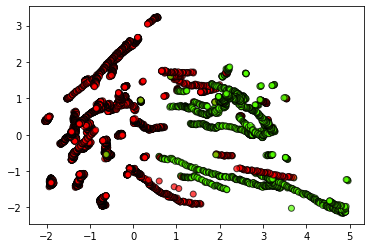

In [9]:
X_pca=pca.transform(X_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [10]:
#Reducing the testset1 set using PCA
pca = PCA(n_components=2)
pca.fit(X_test)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
X_pcat=pca.transform(X_test)

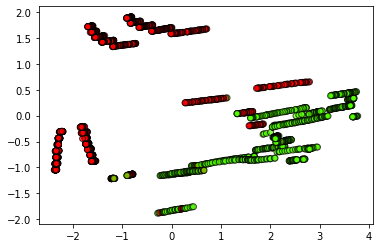

In [12]:
plt.scatter(X_pcat[:, 0], X_pcat[:, 1], c=y_test, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

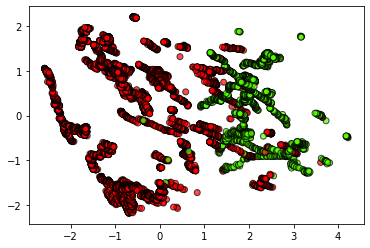

In [13]:
#Reducing the testset2 set using PCA
pca = PCA(n_components=2)
pca.fit(X_test2)
X_pcat2=pca.transform(X_test2)
plt.scatter(X_pcat2[:, 0], X_pcat2[:, 1], c=y_test2, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

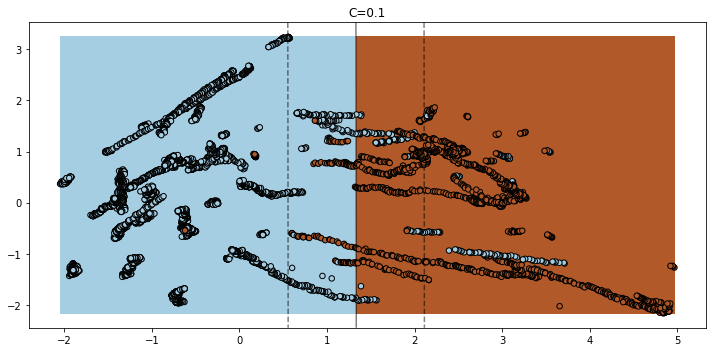

In [13]:
#Plotting the training set with the respective vectors and kernel=linear
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X=X_pca
y=y_train

Xt=X_pcat
yt=y_test

plt.figure(figsize=(10, 5))
for i, C in enumerate([0.1]):
    # "hinge" is the standard SVM loss
    clf = SVC(kernel='linear', C=C).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 1, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, zorder=10, cmap=plt.cm.Paired, edgecolor='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    #plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
    #            linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    
    
    
plt.tight_layout()
plt.show()

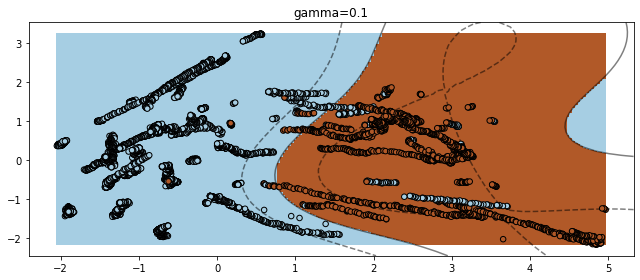

In [14]:
#Plotting the training set with the respective vectors and kernel=rbf
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X=X_pca
y=y_train

Xt=X_pcat
yt=y_test

plt.figure(figsize=(9, 4))
for i, gamma in enumerate([0.1]):
    # "hinge" is the standard SVM loss
    clf = SVC(kernel='rbf', degree=1, gamma=gamma).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 1, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, zorder=10, cmap=plt.cm.Paired, edgecolor='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Linee vettori
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    #plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
    #            linewidth=1, facecolors='none', edgecolors='k')
    plt.title("gamma=" + str(gamma))
    
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    
    
    
plt.tight_layout()
plt.show()

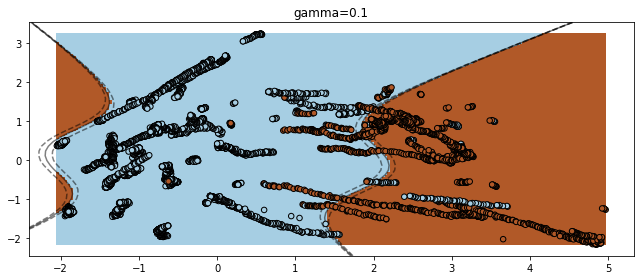

In [14]:
#Plotting the training set with the respective vectors and kernel=rbf
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X=X_pca
y=y_train

Xt=X_pcat
yt=y_test

plt.figure(figsize=(9, 4))
for i, gamma in enumerate([0.1]):
    # "hinge" is the standard SVM loss
    clf = SVC(kernel='poly', degree=4, gamma=8).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 1, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, zorder=10, cmap=plt.cm.Paired, edgecolor='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Linee vettori
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    #plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
    #            linewidth=1, facecolors='none', edgecolors='k')
    plt.title("gamma=" + str(gamma))
    
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    
    
    
plt.tight_layout()
plt.show()